# Portfolio Optimisation for FTSE100 stocks

Importing packages we are going to use 

In [211]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt

Time to import all our stock data we will be using. Finding free data can be quite hard since most places charge hefty prices for intraday data for more than a few months. In this project I used Yahoo Finance to pull stock intraday stock data for each stock in the FTSE100 (except M&G PLC which for some reason was returning NaN's...). Timespan was 19 years

In [212]:
stocks = ['WTB.L', 'WPP.L', 'VOD.L', 'UU.L', 'ULVR.L', 'TW.L', 'TSCO.L', 'SVT.L', 'STJ.L', 'STAN.L', 'SSE.L', 'SPX.L', 'SN.L', 'SMT.L', 'SMIN.L', 'SMDS.L', 'SLA.L', 'SKG.L', 'SGRO.L', 'SGE.L', 'SDR.L', 'SBRY.L', 'RTO.L', 'RSA.L', 'RR.L', 'RMV.L', 'RIO.L', 'REL.L', 'RDSA.L', 'RB.L', 'PSON.L', 'PSN.L', 'PRU.L', 'POLY.L', 'PNN.L', 'PHNX.L', 'OCDO.L', 'NXT.L', 'NG.L', 'MRW.L', 'MRO.L', 'MNDI.L', 'LSE.L', 'LLOY.L', 'LGEN.L', 'LAND.L', 'KGF.L', 'JMAT.L', 'JET.L', 'JD.L', 'ITV.L', 'ITRK.L', 'INF.L', 'IMB.L', 'III.L', 'IHG.L', 'ICP.L', 'IAG.L', 'HSV.L', 'HSBA.L', 'HLMA.L', 'HL.L', 'HIK.L', 'GVC.L', 'GSK.L', 'GLEN.L', 'FRES.L', 'FLTR.L', 'FERG.L', 'EXPN.L', 'EVR.L', 'DGE.L', 'DCC.L', 'CRH.L', 'CRDA.L', 'CPG.L', 'CCH.L', 'BT-A.L', 'BRBY.L', 'BP.L', 'BNZL.L', 'BLND.L', 'BKG.L', 'BHP.L', 'BDEV.L', 'BATS.L', 'BARC.L', 'BA.L', 'AZN.L', 'AVV.L', 'AVST.L', 'AV.L', 'AUTO.L', 'ANTO.L', 'AHT.L', 'ADM.L', 'ABF.L', 'AAL.L']
df = data.DataReader(stocks, 'yahoo', start = '2000/01/01', end = '2019/01/01')
prices = df['Adj Close']
prices.head()

Symbols,WTB.L,WPP.L,VOD.L,UU.L,ULVR.L,TW.L,TSCO.L,SVT.L,STJ.L,STAN.L,...,AZN.L,AVV.L,AVST.L,AV.L,AUTO.L,ANTO.L,AHT.L,ADM.L,ABF.L,AAL.L
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,604.700745,NaN,147.566360,189.198441,565.992493,0.014086,109.078445,374.635376,131.615982,381.433258,...,1155.672729,78.619392,NaN,258.891846,NaN,28.022253,98.288185,NaN,222.255676,763.741760
2000-01-04,587.255127,563.862366,141.794525,182.629669,567.235168,0.014507,105.312141,362.756683,131.913940,370.915070,...,1104.963013,79.714745,NaN,241.770920,NaN,28.022253,98.578033,NaN,215.279800,742.395325
2000-01-05,585.820312,508.638733,134.916306,185.280792,570.968811,0.015085,107.050423,367.934509,128.638519,356.229218,...,1082.359009,76.672447,NaN,234.507492,NaN,28.022253,97.707985,NaN,218.686661,748.890991
2000-01-06,592.515564,504.279144,130.828064,192.497665,589.626160,0.015453,107.050423,395.956055,141.442856,332.215942,...,1080.112915,74.238113,NaN,232.432175,NaN,28.119221,96.548759,NaN,239.452179,767.268616
2000-01-07,621.208679,523.171387,138.187119,195.885056,618.236084,0.015821,105.601837,409.966919,150.077942,334.994690,...,1105.751465,75.090401,NaN,237.620224,NaN,28.119221,96.548759,NaN,232.313995,794.365967


Time to create our covariance matrix. The covariance between two stocks will tell us the whether two stocks move together in the same direction or not with a positive covariance indicating a higher likelihood for two stocks to move in the same direction over time. The matrix simply represents this is a n by n matrix which we can perform operations on. We calculate daily percetange change in the stocks then find the natural log of these percentage changes. Doing this helps to 'normalise' the data thus allowing us to apply statistical treament to the data as the distribution of log normal percentage change is likely to approximate a gaussian type function

In [213]:
covariance_matrix = prices.pct_change().apply(lambda x: np.log(1+x)).cov()
covariance_matrix

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Symbols,WTB.L,WPP.L,VOD.L,UU.L,ULVR.L,TW.L,TSCO.L,SVT.L,STJ.L,STAN.L,...,AZN.L,AVV.L,AVST.L,AV.L,AUTO.L,ANTO.L,AHT.L,ADM.L,ABF.L,AAL.L
Symbols,,,,,,,,,,,,,,,,,,,,,
WTB.L,0.000312,0.000122,0.000080,0.000064,0.000074,0.000042,0.000080,0.000068,0.000143,0.000147,...,0.000065,0.000098,0.000042,0.000171,0.000095,0.000135,0.000152,0.000101,0.000089,0.000160
WPP.L,0.000122,0.000435,0.000186,0.000080,0.000084,0.000159,0.000085,0.000065,0.000154,0.000210,...,0.000110,0.000129,0.000102,0.000214,0.000098,0.000174,0.000191,0.000108,0.000080,0.000232
VOD.L,0.000080,0.000186,0.000395,0.000073,0.000082,0.000090,0.000086,0.000066,0.000117,0.000167,...,0.000098,0.000068,0.000047,0.000170,0.000063,0.000108,0.000110,0.000094,0.000072,0.000166
UU.L,0.000064,0.000080,0.000073,0.000187,0.000074,0.000081,0.000068,0.000123,0.000061,0.000090,...,0.000069,0.000043,0.000006,0.000104,0.000049,0.000064,0.000046,0.000061,0.000072,0.000094
ULVR.L,0.000074,0.000084,0.000082,0.000074,0.000216,0.000103,0.000085,0.000075,0.000078,0.000097,...,0.000088,0.000045,0.000016,0.000109,0.000041,0.000076,0.000071,0.000068,0.000088,0.000101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANTO.L,0.000135,0.000174,0.000108,0.000064,0.000076,0.000199,0.000091,0.000064,0.000170,0.000248,...,0.000074,0.000157,0.000097,0.000241,0.000071,0.000671,0.000231,0.000156,0.000070,0.000505
AHT.L,0.000152,0.000191,0.000110,0.000046,0.000071,0.000274,0.000068,0.000045,0.000224,0.000211,...,0.000091,0.000158,0.000123,0.000199,0.000087,0.000231,0.001583,0.000121,0.000074,0.000233
ADM.L,0.000101,0.000108,0.000094,0.000061,0.000068,0.000195,0.000080,0.000062,0.000129,0.000157,...,0.000066,0.000087,0.000049,0.000187,0.000075,0.000156,0.000121,0.000369,0.000086,0.000160


We now calculate our mean yearly expected return for each stock over the 19 years by finding the yearly percentage change in the stock over 19 years and dividing by 19

In [214]:
e_r = prices.resample('Y').last().pct_change().mean()
e_r

Symbols
WTB.L     0.149448
WPP.L     0.061058
VOD.L     0.035355
UU.L      0.077980
ULVR.L    0.105493
            ...   
ANTO.L    0.284234
AHT.L     0.467380
ADM.L     0.229326
ABF.L     0.127278
AAL.L     0.204075
Length: 98, dtype: float64

Calculation of the mean standard deviation ie mean volatility of each stock, 252 denotes the number of trading days in a year

In [215]:
sd = prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
sd

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Symbols
WTB.L     0.280383
WPP.L     0.331016
VOD.L     0.315635
UU.L      0.216876
ULVR.L    0.233487
            ...   
ANTO.L    0.411183
AHT.L     0.631505
ADM.L     0.304838
ABF.L     0.238466
AAL.L     0.452130
Length: 98, dtype: float64

Create a table called assets with returns and volatility

In [216]:
assets = pd.concat([e_r,sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
WTB.L,0.149448,0.280383
WPP.L,0.061058,0.331016
VOD.L,0.035355,0.315635
UU.L,0.077980,0.216876
ULVR.L,0.105493,0.233487
...,...,...
ANTO.L,0.284234,0.411183
AHT.L,0.467380,0.631505
ADM.L,0.229326,0.304838


We have now found the mean returns and volatility for each stock over the 19 years we've analysed. What we want to know is what weightings of each stock would give us the optimal portfolio. In order to do this we are going to generate random numbers between 0 and 1 and assign this to each stock and calculate the returns and volatility of the portfolio generated. To optimise this portfolio we are going to iterate this process a given number of times. We are now going to calculate the create three empty lists for percentage change, percentage volalitility and percentage weights. 

In [217]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(prices.columns)
num_portfolio = 2000

We iterate each portfolio assigning random numbers to each weighting for each stock. We take the dot product between the vectors weights and e_r (expected return). To make sure this returns a non zero value, We added a .fillna(0) meaning that if there is a NaN, then we replace this with a zero and continute with our dot product. Failing to do so would compromise the calculating of returns and give us NaN's in all columns. 

In [218]:
for portfolio in range(num_portfolio):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,e_r.fillna(0))
    p_ret.append(returns)
    var = covariance_matrix.mul(weights,axis =0).mul(weights,axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(252)
    p_vol.append(ann_sd)

In [219]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [220]:
for counter, symbol in enumerate(prices.columns.tolist()):
    data[symbol+'weight'] = [w[counter]for w in p_weights]

In [221]:
portfolio = pd.DataFrame(data)
portfolio

,Returns,Volatility,WTB.Lweight,WPP.Lweight,VOD.Lweight,UU.Lweight,ULVR.Lweight,TW.Lweight,TSCO.Lweight,SVT.Lweight,...,AZN.Lweight,AVV.Lweight,AVST.Lweight,AV.Lweight,AUTO.Lweight,ANTO.Lweight,AHT.Lweight,ADM.Lweight,ABF.Lweight,AAL.Lweight
0,0.245186,0.174457,0.006535,0.017013,0.002054,0.016770,0.019141,0.009495,0.004812,0.006358,...,0.001395,0.008623,0.003891,0.011046,0.014372,0.017473,0.017451,0.002744,0.014958,0.009138
1,0.284801,0.180721,0.017848,0.015608,0.007816,0.008087,0.010691,0.000795,0.011487,0.008706,...,0.010628,0.000108,0.007981,0.003544,0.006627,0.008859,0.016266,0.019038,0.004568,0.013678
2,0.408850,0.187466,0.005386,0.016870,0.007817,0.016355,0.000646,0.017700,0.014858,0.007826,...,0.010507,0.016762,0.012882,0.013757,0.003862,0.018418,0.004414,0.017905,0.001253,0.014207
3,0.288911,0.200028,0.015503,0.009595,0.005189,0.003123,0.000817,0.009626,0.015303,0.020887,...,0.019951,0.012874,0.011304,0.017538,0.019152,0.006581,0.020564,0.004202,0.016236,0.002129
4,0.354241,0.185062,0.002064,0.012880,0.003610,0.010298,0.009402,0.010805,0.017102,0.006701,...,0.013911,0.016168,0.010002,0.019508,0.011121,0.011363,0.015799,0.003640,0.013607,0.017745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.312885,0.183821,0.009147,0.008057,0.016489,0.006158,0.008767,0.006637,0.000934,0.000177,...,0.016760,0.015054,0.013839,0.003153,0.012339,0.017918,0.014330,0.001385,0.012052,0.010969
1996,0.340480,0.174134,0.007481,0.006707,0.001060,0.019176,0.007700,0.014004,0.011636,0.018378,...,0.020616,0.020294,0.004644,0.012834,0.007804,0.017050,0.004280,0.007894,0.018021,0.015595
1997,0.338040,0.191118,0.003468,0.013565,0.007290,0.013353,0.007496,0.015342,0.020147,0.005144,...,0.004605,0.012683,0.012244,0.008571,0.007789,0.010833,0.004613,0.004605,0.006797,0.018146
1998,0.329642,0.183244,0.014912,0.013487,0.011946,0.007075,0.007338,0.005685,0.012143,0.015932,...,0.017096,0.007388,0.009995,0.005920,0.002170,0.008198,0.018759,0.018910,0.011643,0.014226


### Calculation of the Global Minimum Variance Portfolio

In [222]:
min_var_port = portfolio.iloc[portfolio['Volatility'].idxmin()]
min_var_port

Returns         0.299583
Volatility      0.161828
WTB.Lweight     0.014123
WPP.Lweight     0.011544
VOD.Lweight     0.021121
                  ...   
ANTO.Lweight    0.011096
AHT.Lweight     0.004569
ADM.Lweight     0.021311
ABF.Lweight     0.012002
AAL.Lweight     0.008171
Name: 1177, Length: 100, dtype: float64

### Graphing Global Portfolio Investment Universe 

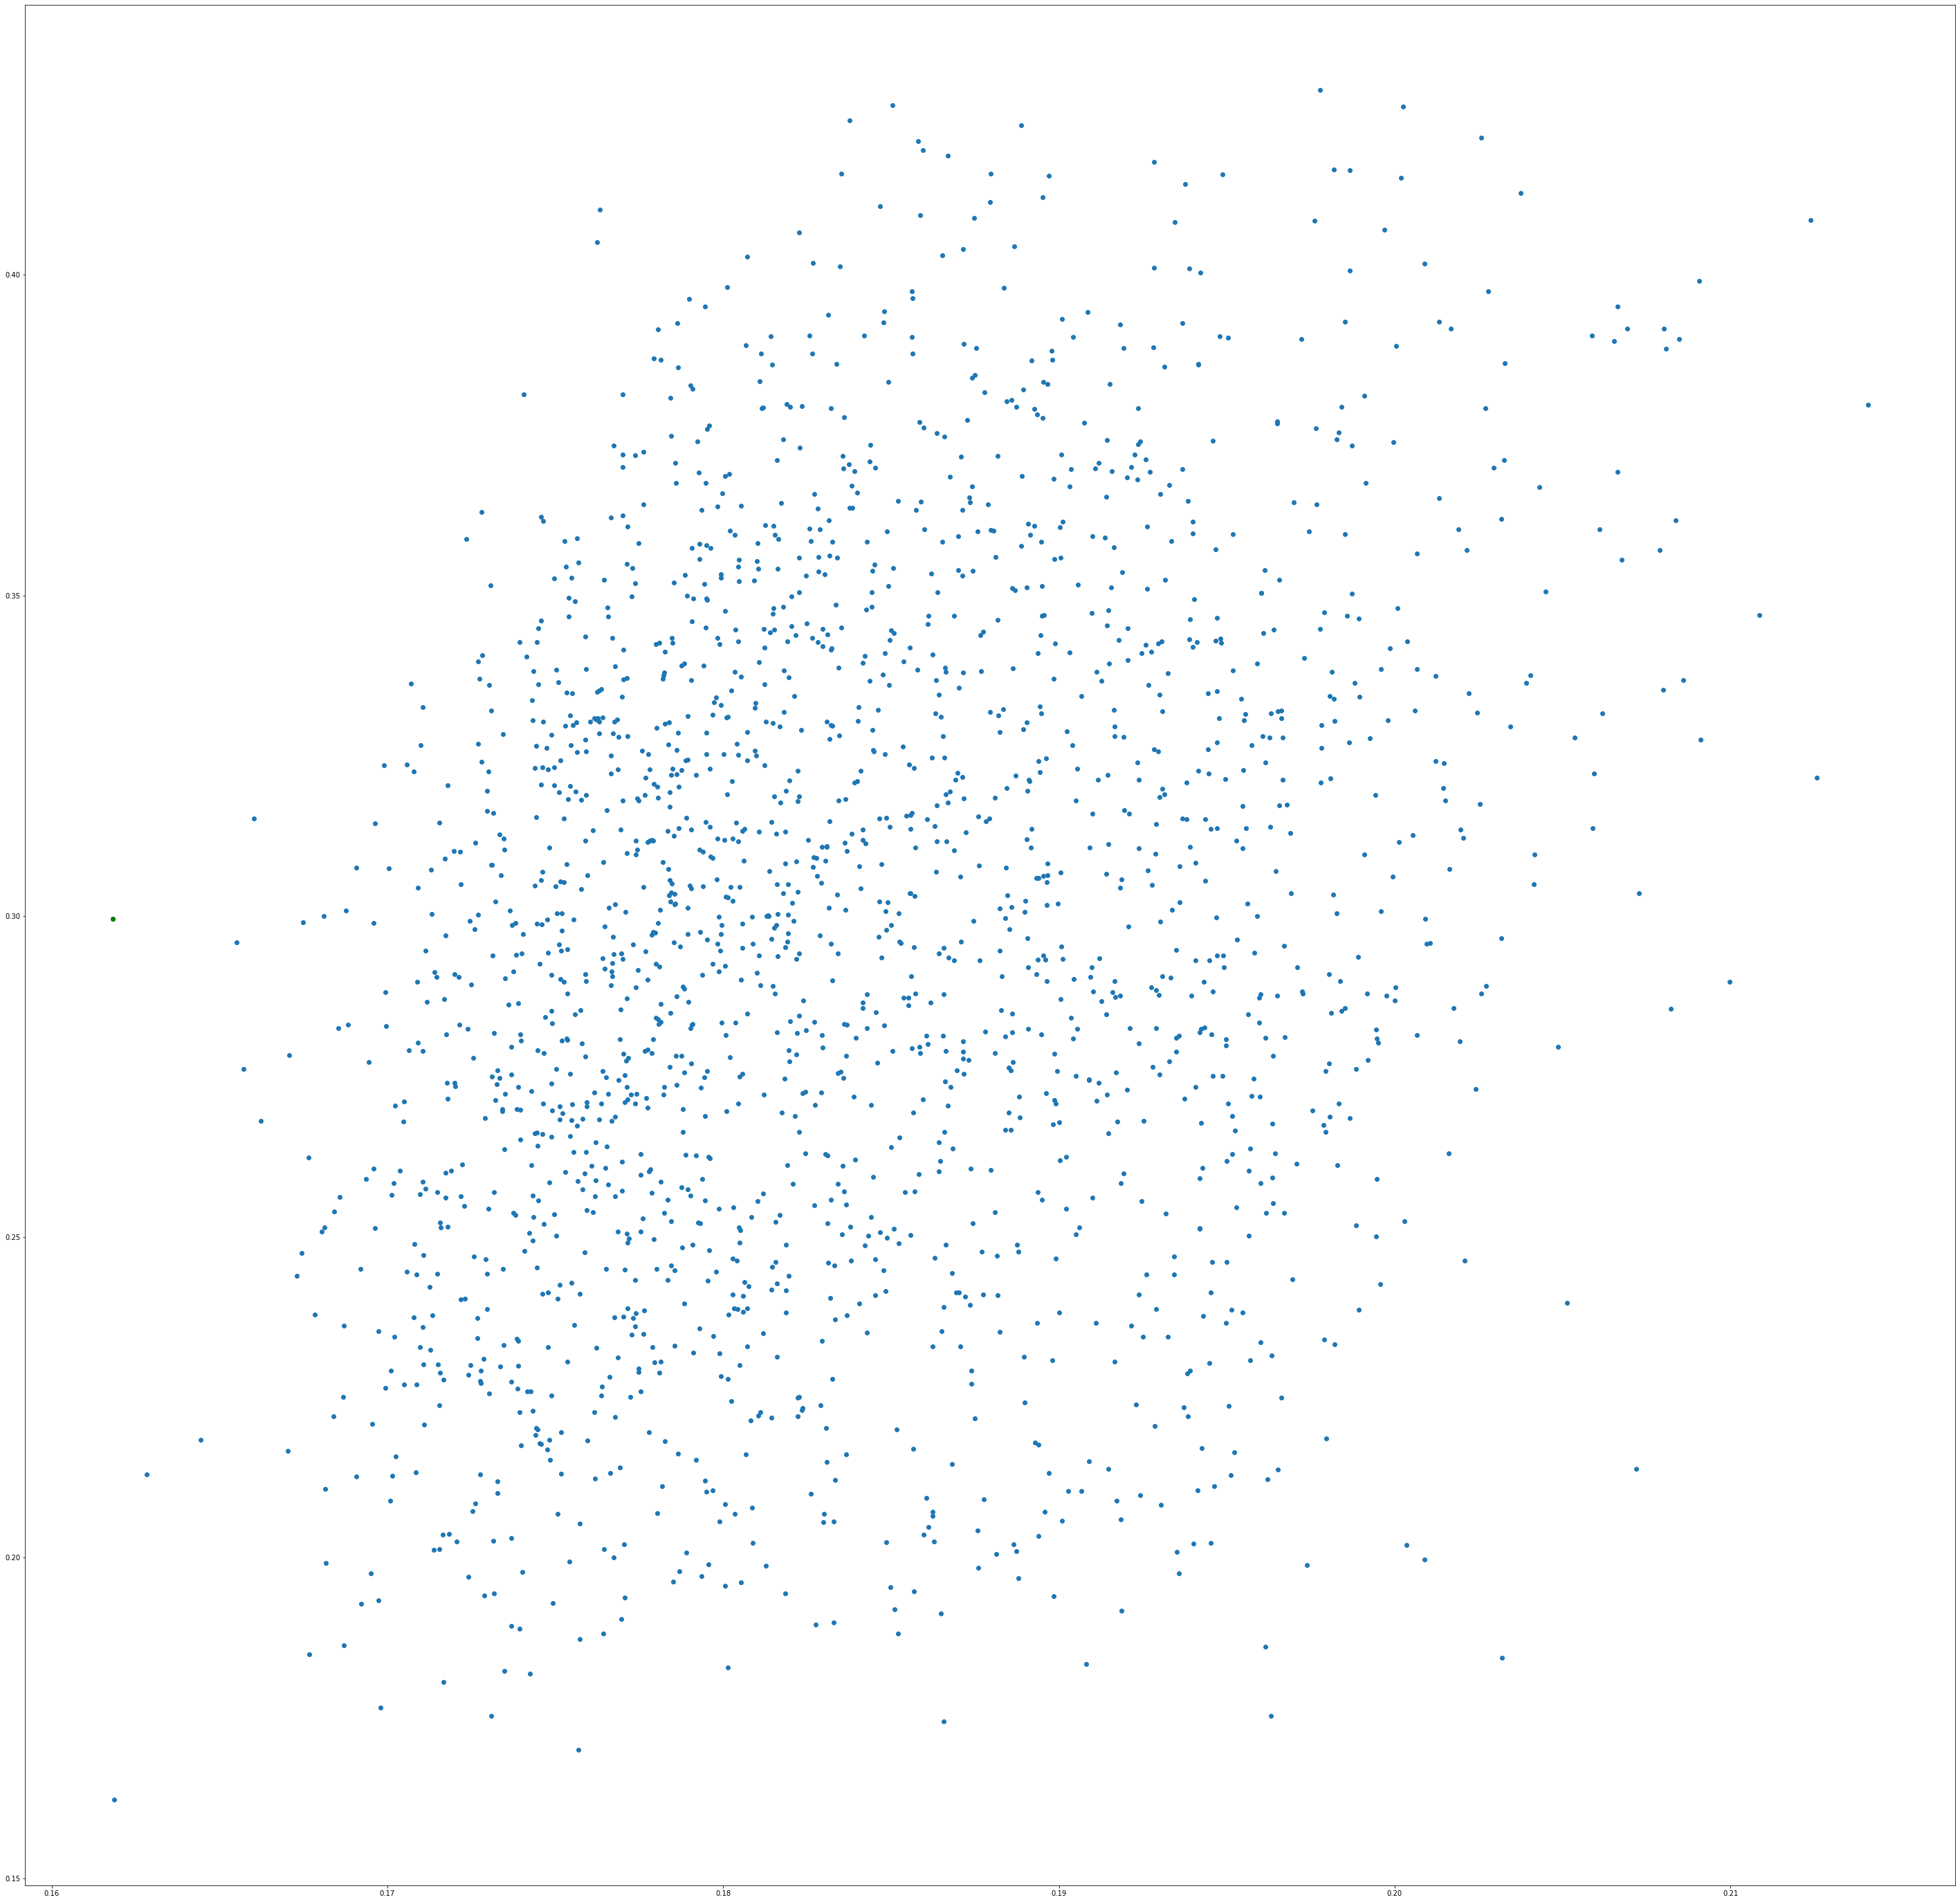

In [223]:
plt.subplots(figsize = (50,50))
plt.scatter(portfolio['Volatility'],portfolio['Returns'])
plt.scatter(min_var_port[1],min_var_port[0],color ='g')

### Calculation of Optimal Variance Portfolio along with Optimal Sharpe Ratio

Optimal Sharpe Ratio

In [224]:
rf = 0.01
s_r = ((portfolio['Returns']-rf)/portfolio['Volatility']).max()
s_r

2.2697137412072372

In [225]:
opt_var_port = portfolio.iloc[((portfolio['Returns']-rf)/portfolio['Volatility']).idxmax()]
opt_var_port

Returns         0.410193
Volatility      0.176319
WTB.Lweight     0.014957
WPP.Lweight     0.000424
VOD.Lweight     0.017957
                  ...   
ANTO.Lweight    0.001856
AHT.Lweight     0.016007
ADM.Lweight     0.015413
ABF.Lweight     0.015248
AAL.Lweight     0.016424
Name: 1778, Length: 100, dtype: float64

Graphing Global Minimum Variance Portfolio (green) along with Optimal Variance Portfolio (red) within Global Portfolio Investment Universe

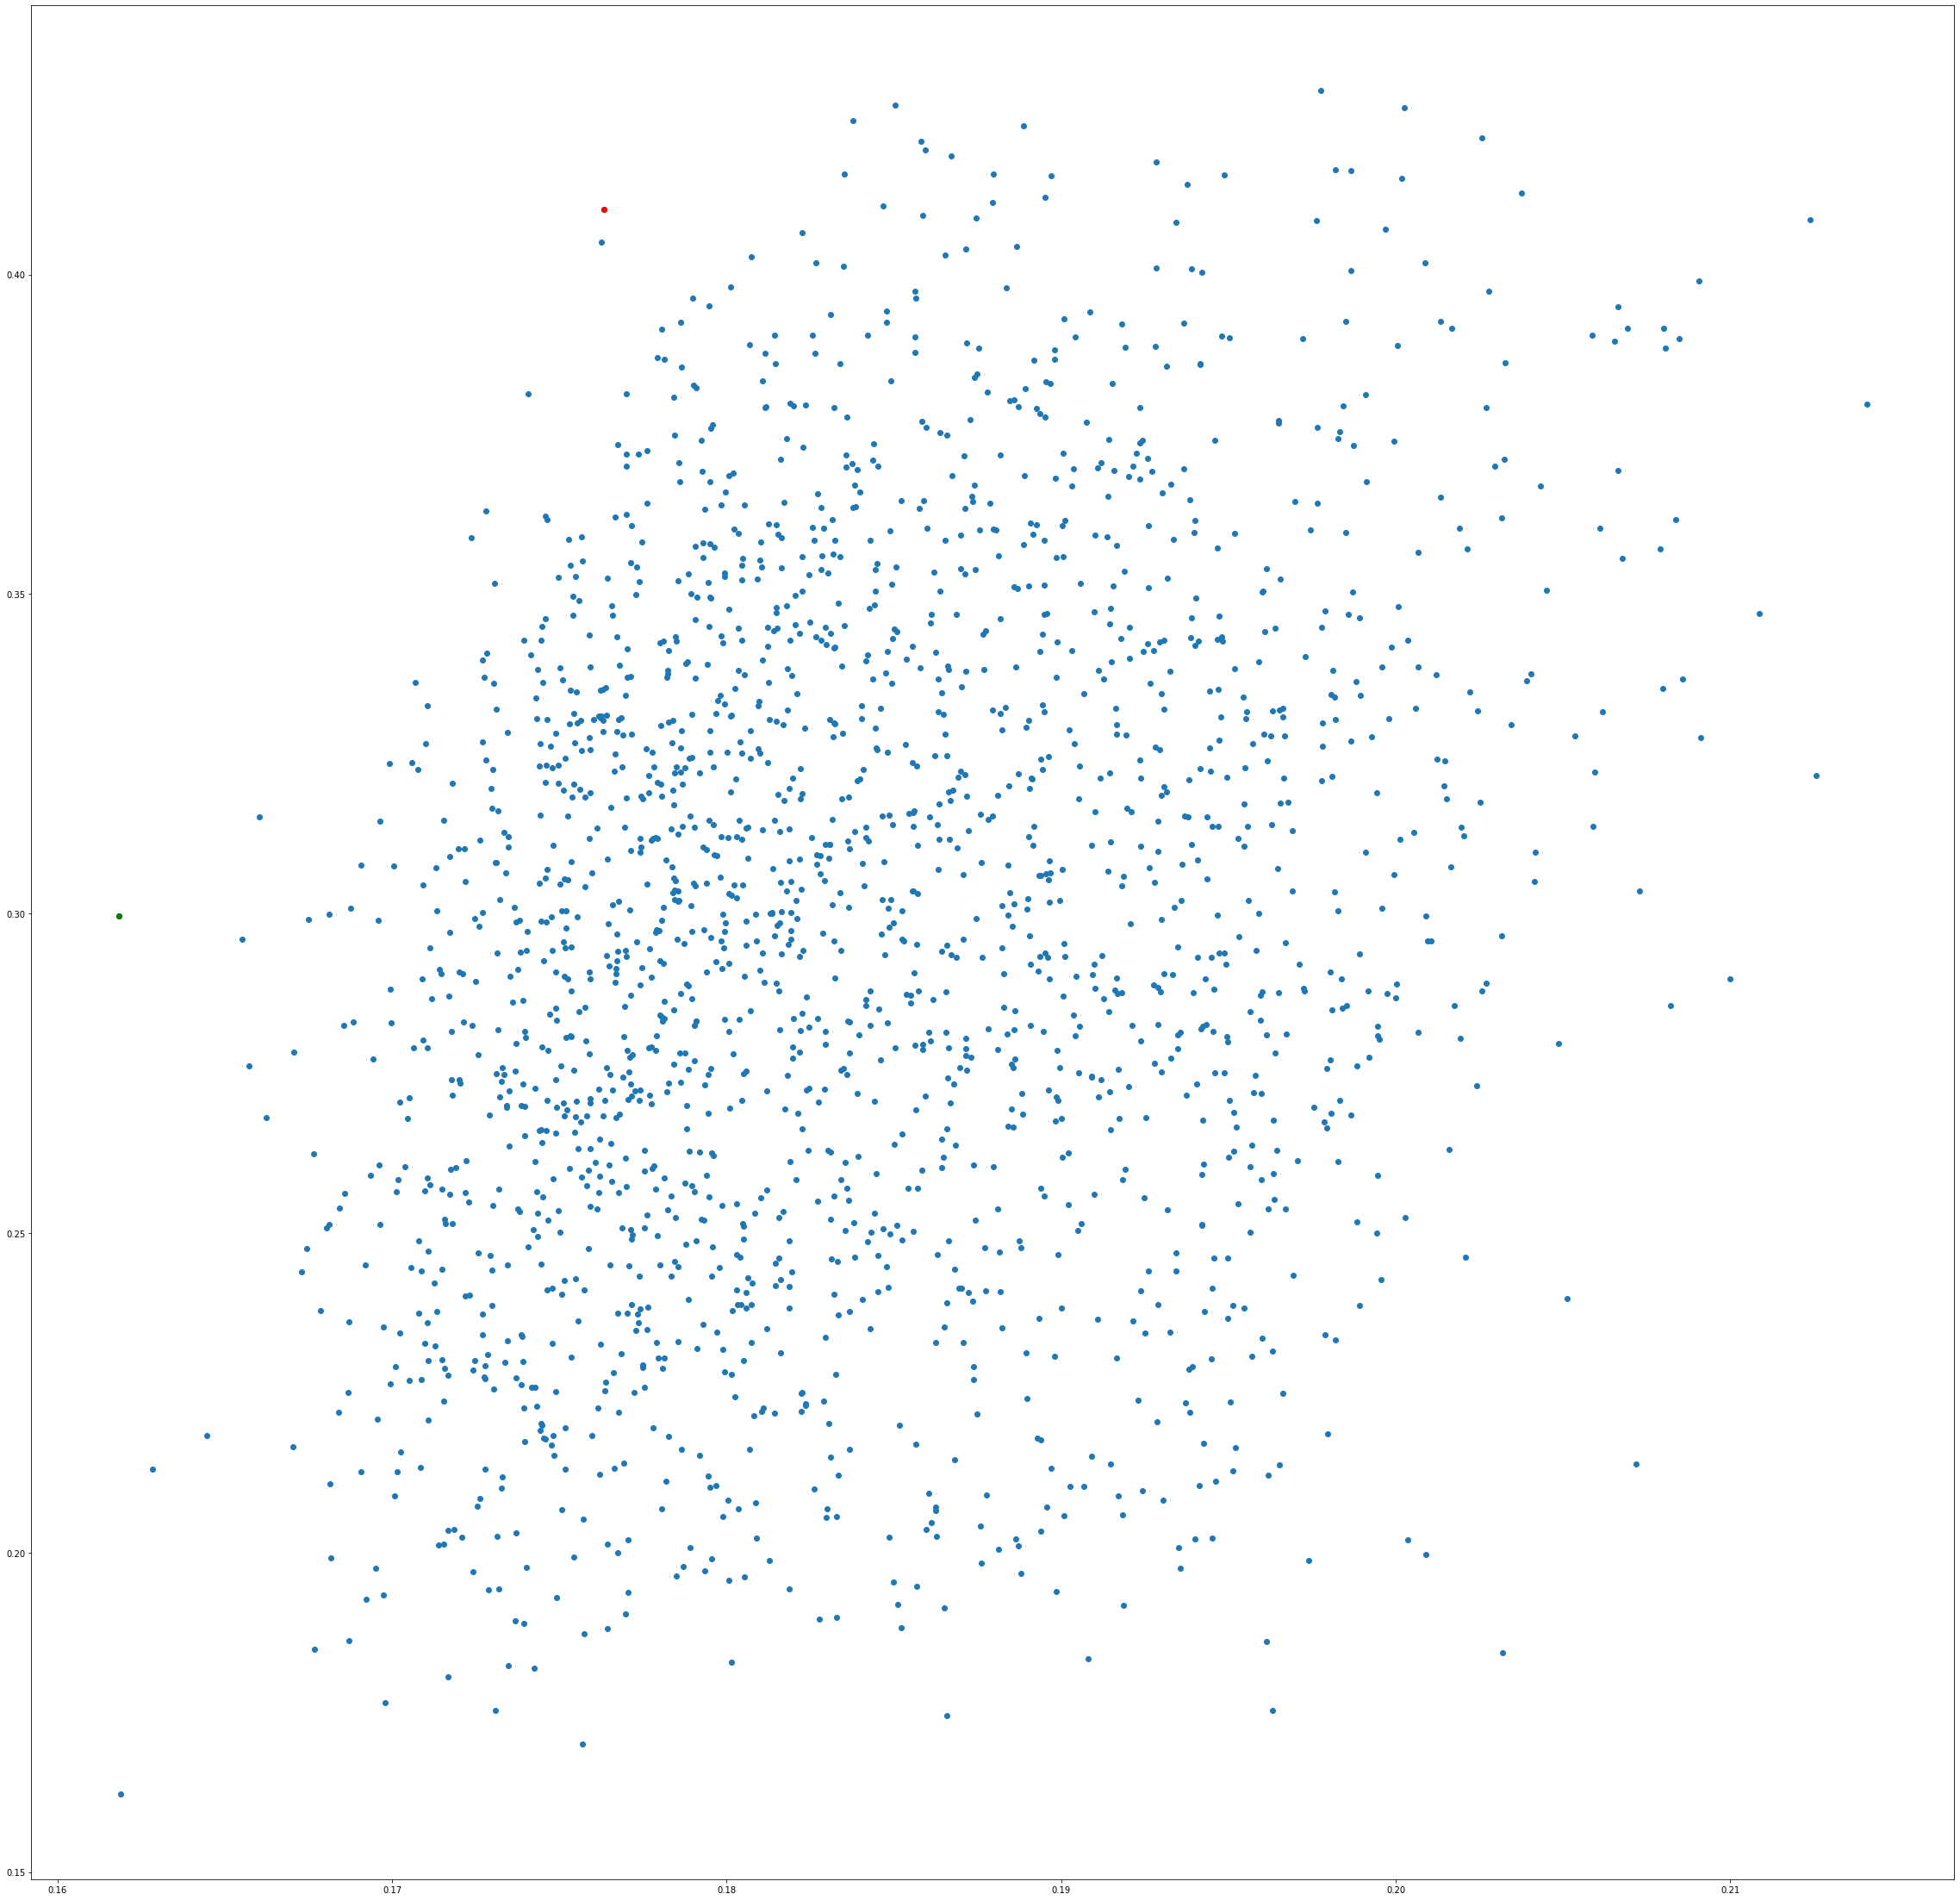

In [226]:
plt.subplots(figsize = (40,40))
plt.scatter(portfolio['Volatility'],portfolio['Returns'])
plt.scatter(min_var_port[1],min_var_port[0],color ='g')
plt.scatter(opt_var_port[1],opt_var_port[0],color ='r')